In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree

In [17]:
fraud_data = pd.read_csv('./Fraud_check.csv')

In [18]:
fraud_data.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [19]:
fraud_data.shape

(600, 6)

In [20]:
fraud_data_new=fraud_data.rename({'Marital.Status': 'MaritalStatus','Taxable.Income':'TaxableIncome','City.Population':'CityPopulation','Work.Experience':'WorkExperience'}, axis=1)

In [21]:
fraud_data_new.head()

Undergrad MaritalStatus  TaxableIncome  CityPopulation  WorkExperience Urban
0        NO        Single          68833           50047              10   YES
1       YES      Divorced          33700          134075              18   YES
2        NO       Married          36925          160205              30   YES
3       YES        Single          50190          193264              15   YES
4        NO       Married          81002           27533              28    NO

In [22]:
fraud_data_new = pd.get_dummies(fraud_data_new, columns=['Undergrad','MaritalStatus','Urban'])

In [23]:
fraud_data_new.head()

TaxableIncome  CityPopulation  WorkExperience  Undergrad_NO  Undergrad_YES  \
0          68833           50047              10             1              0   
1          33700          134075              18             0              1   
2          36925          160205              30             1              0   
3          50190          193264              15             0              1   
4          81002           27533              28             1              0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                       0                      0                     1   
1                       1                      0                     0   
2                       0                      1                     0   
3                       0                      0                     1   
4                       0                      1                     0   

   Urban_NO  Urban_YES  
0         0          1  
1         0          1  
2         0          1  
3         0          1  
4         1          0

In [26]:
fraud_data_new["income"]="<=30000"
fraud_data_new.loc[fraud_data_new["TaxableIncome"]>=30000,"income"]="Good"
fraud_data_new.loc[fraud_data_new["TaxableIncome"]<=30000,"income"]="Risky"

In [28]:
fraud_data_new.head(10)

TaxableIncome  CityPopulation  WorkExperience  Undergrad_NO  Undergrad_YES  \
0          68833           50047              10             1              0   
1          33700          134075              18             0              1   
2          36925          160205              30             1              0   
3          50190          193264              15             0              1   
4          81002           27533              28             1              0   
5          33329          116382               0             1              0   
6          83357           80890               8             1              0   
7          62774          131253               3             0              1   
8          83519          102481              12             1              0   
9          98152          155482               4             0              1   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                       0                      0                     1   
1                       1                      0                     0   
2                       0                      1                     0   
3                       0                      0                     1   
4                       0                      1                     0   
5                       1                      0                     0   
6                       1                      0                     0   
7                       0                      0                     1   
8                       0                      0                     1   
9                       1                      0                     0   

   Urban_NO  Urban_YES income  
0         0          1   Good  
1         0          1   Good  
2         0          1   Good  
3         0          1   Good  
4         1          0   Good  
5         1          0   Good  
6         0          1   Good  
7         0          1   Good  
8         0          1   Good  
9         0          1   Good

In [29]:
fraud_data_new.shape

(600, 11)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
labelEncoder = LabelEncoder()

In [50]:
fraud_data_new.iloc[:,10] = labelEncoder.fit_transform(fraud_data_new.iloc[:,10])

In [51]:
X = fraud_data_new.iloc[:,1:10]
Y= fraud_data_new.iloc[:,10]

In [52]:
X

CityPopulation  WorkExperience  Undergrad_NO  Undergrad_YES  \
0             50047              10             1              0   
1            134075              18             0              1   
2            160205              30             1              0   
3            193264              15             0              1   
4             27533              28             1              0   
..              ...             ...           ...            ...   
595           39492               7             0              1   
596           55369               2             0              1   
597          154058               0             1              0   
598          180083              17             0              1   
599          158137              16             1              0   

     MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                         0                      0                     1   
1                         1                      0                     0   
2                         0                      1                     0   
3                         0                      0                     1   
4                         0                      1                     0   
..                      ...                    ...                   ...   
595                       1                      0                     0   
596                       1                      0                     0   
597                       1                      0                     0   
598                       0                      1                     0   
599                       1                      0                     0   

     Urban_NO  Urban_YES  
0           0          1  
1           0          1  
2           0          1  
3           0          1  
4           1          0  
..        ...        ...  
595         0          1  
596         0          1  
597         0          1  
598         1          0  
599         1          0  

[600 rows x 9 columns]

In [53]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: income, Length: 600, dtype: int64

In [54]:
x_train,  x_test,  y_train, y_test = train_test_split(X,Y, test_size =0.2, random_state = 40)

In [55]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

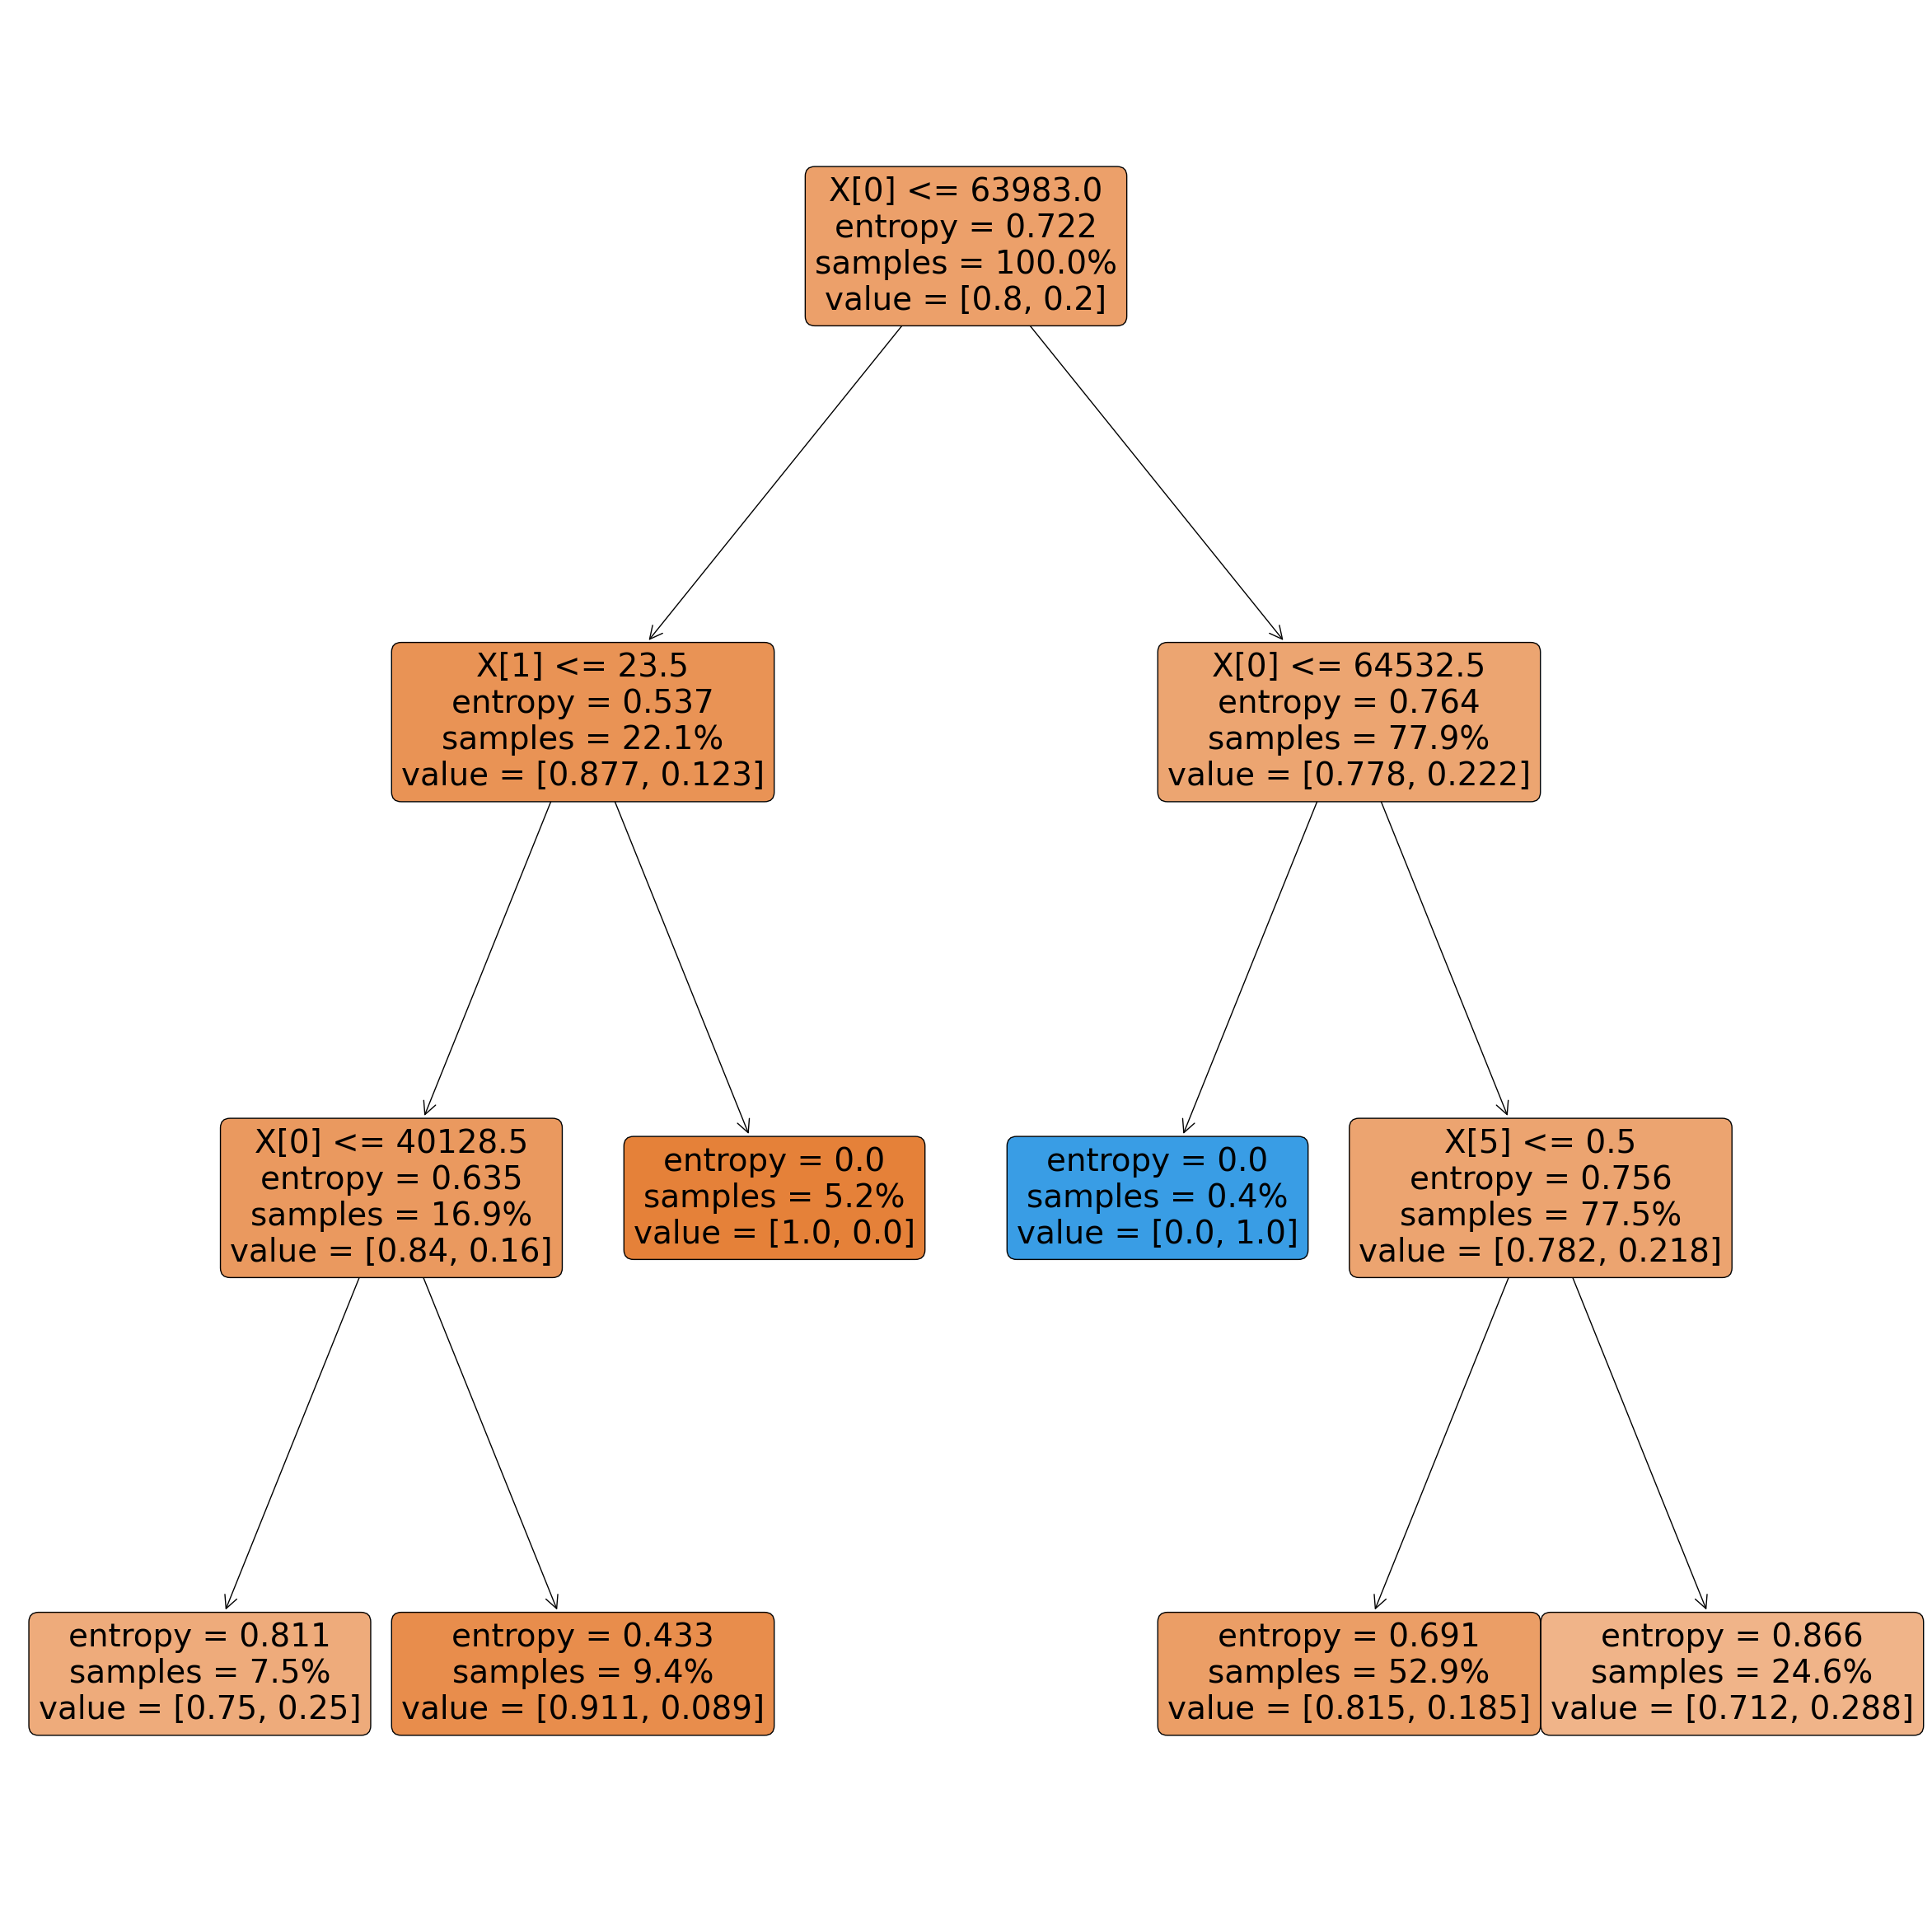

In [56]:
plt.figure(figsize=(30, 30))
tree.plot_tree(model_entropy,
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True); # Displays the proportions of class samples instead of the whole number of samples

In [59]:
y_pred = model_entropy.predict(x_test)
pd.Series(y_pred).value_counts() # getting the count of each category 

0    120
dtype: int64

In [60]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
pd.crosstab(y_test,y_pred)

col_0    0
income    
0       92
1       28

In [62]:
#measuring accuracy
np.mean(y_pred==y_test)

0.7666666666666667

In [63]:
model_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

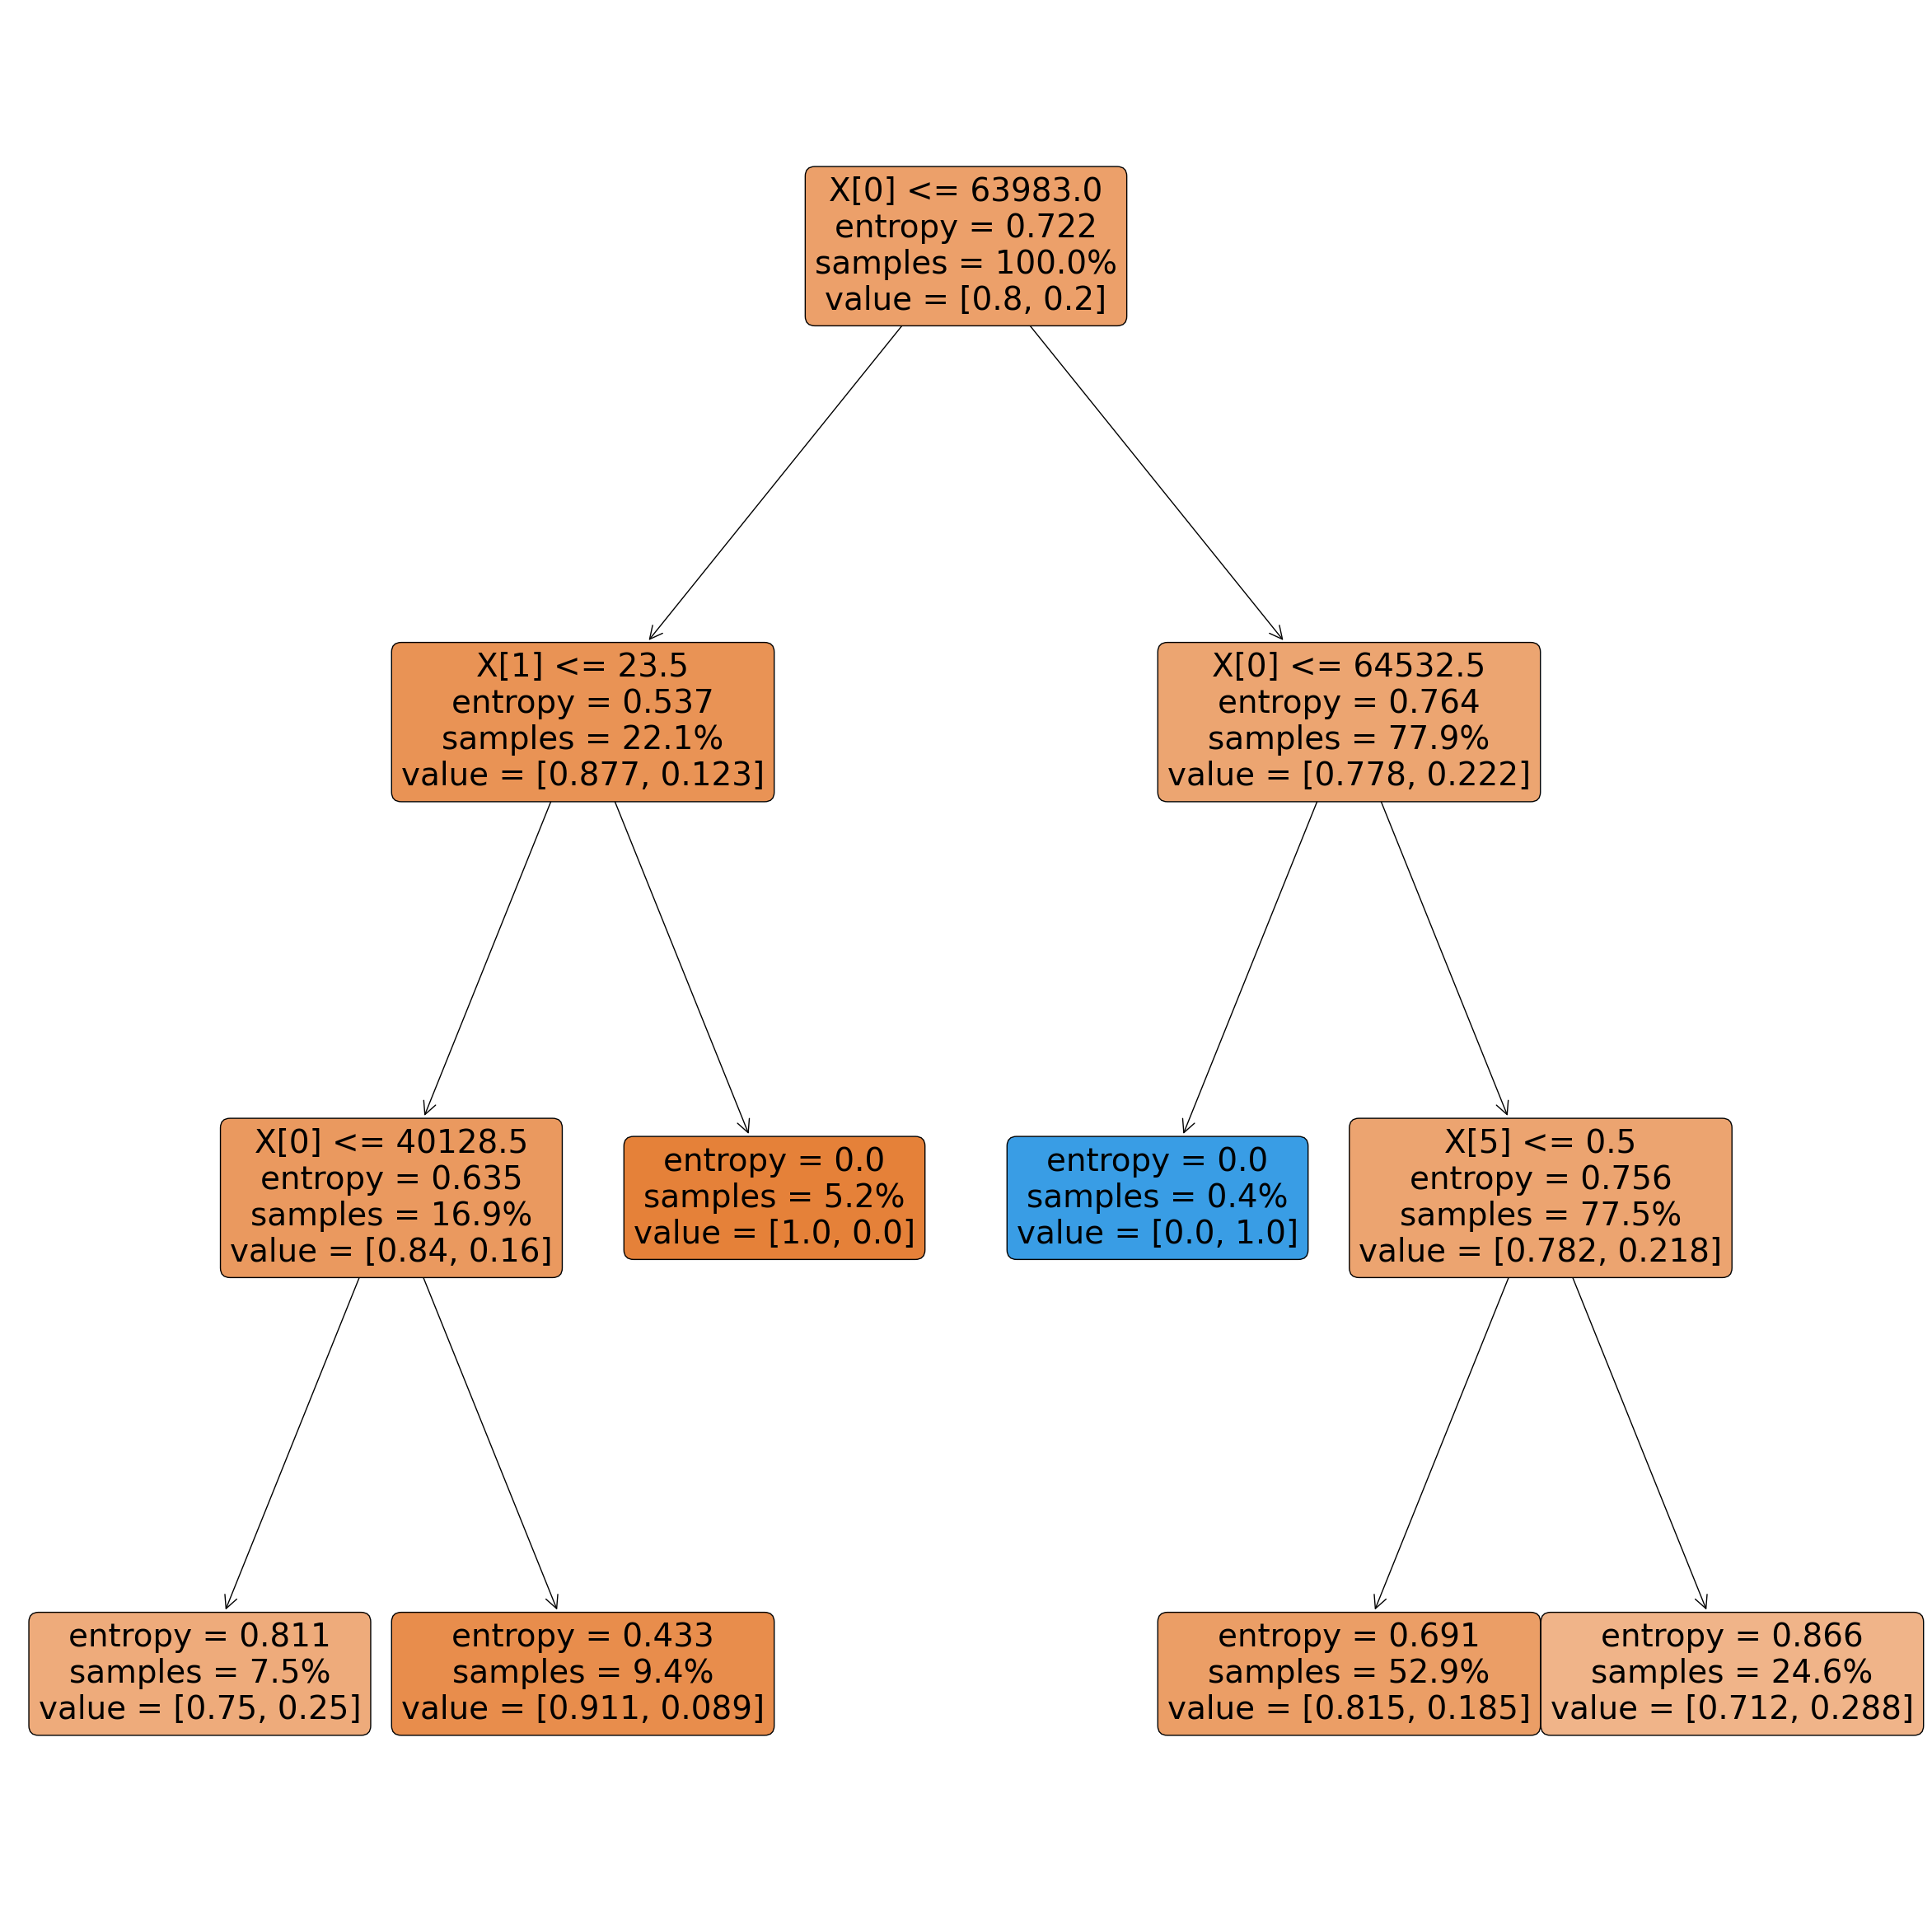

In [64]:
plt.figure(figsize=(30, 30))
tree.plot_tree(model_entropy,
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True); # Displays the proportions of class samples instead of the whole number of samples

In [65]:
y_pred_2 = model_gini.predict(x_test)

In [66]:
#measuring accuracy
np.mean(y_pred_2 ==y_test)

0.7583333333333333